#### Loading Libraries

In [47]:
import pandas as pd
from scipy.io import arff

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data


In [48]:
df = pd.read_csv('../../data/miami2016.csv')

##### Initial Data Review

<hr>

### Descriptive Statistics

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13932 non-null  int64  
 1   LATITUDE           13932 non-null  float64
 2   LONGITUDE          13932 non-null  float64
 3   PARCELNO           13932 non-null  float64
 4   SALE_PRC           13932 non-null  float64
 5   LND_SQFOOT         13932 non-null  float64
 6   TOT_LVG_AREA       13932 non-null  float64
 7   SPEC_FEAT_VAL      13932 non-null  float64
 8   RAIL_DIST          13909 non-null  float64
 9   OCEAN_DIST         13932 non-null  float64
 10  WATER_DIST         13932 non-null  float64
 11  CNTR_DIST          13932 non-null  float64
 12  SUBCNTR_DI         13932 non-null  float64
 13  HWY_DIST           13932 non-null  float64
 14  age                13932 non-null  float64
 15  avno60plus         13932 non-null  float64
 16  month_sold         139

In [50]:
df.describe()

,Unnamed: 0,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.00000,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13909.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,6965.50000,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8351.306507,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,4021.96631,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6182.537689,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,0.00000,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,3482.75000,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3291.900000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,6965.50000,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7116.900000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,10448.25000,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12110.200000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,13931.00000,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [51]:
df.shape

(13932, 18)

---

## Data Description

- PARCELNO: unique identifier for each property. About 1% appear multiple times.
- SALE_PRC: sale price ($)
- LND_SQFOOT: land area (square feet) 
- TOT_LVG_AREA: floor area (square feet) 
- SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)
- RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
- OCEAN_DIST: distance to the ocean (feet) 
- WATER_DIST: distance to the nearest body of water (feet) 
- CNTR_DIST: distance to the Miami central business district (feet)
- SUBCNTR_DI: distance to the nearest subcenter (feet)
- HWY_DIST: distance to the nearest highway (an indicator of noise) (feet) 
- age: age of the structure
- avno60plus: dummy variable for airplane noise exceeding an acceptable level 
- structure_quality: quality of the structure 
- month_sold: sale month in 2016 (1 = jan)
- LATITUDE
- LONGITUDE

---

In [52]:
df

,Unnamed: 0,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,0,25.891031,-80.160561,6.222801e+11,440000.0,9375.0,1753.0,0.0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67.0,0.0,8.0,4.0
1,1,25.891324,-80.153968,6.222801e+11,349000.0,9375.0,1715.0,0.0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63.0,0.0,9.0,4.0
2,2,25.891334,-80.153740,6.222801e+11,800000.0,9375.0,2276.0,49206.0,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61.0,0.0,2.0,4.0
3,3,25.891765,-80.152657,6.222801e+11,988000.0,12450.0,2058.0,10033.0,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63.0,0.0,9.0,4.0
4,4,25.891825,-80.154639,6.222801e+11,755000.0,12800.0,1684.0,16681.0,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42.0,0.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,13927,25.783130,-80.259795,1.313200e+11,275000.0,6780.0,967.0,6580.0,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16.0,0.0,4.0,4.0
13928,13928,25.783585,-80.260354,1.313200e+11,340000.0,7500.0,1854.0,2544.0,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26.0,0.0,5.0,4.0
13929,13929,25.783793,-80.256126,1.313200e+11,287500.0,8460.0,1271.0,2064.0,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16.0,0.0,7.0,4.0
13930,13930,25.784007,-80.257542,1.313200e+11,315000.0,7500.0,1613.0,3136.0,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16.0,0.0,8.0,4.0


## IDR


In [53]:
df.columns

Index(['Unnamed: 0', 'LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC',
       'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [54]:
df.drop(columns=['Unnamed: 0'],inplace=True)

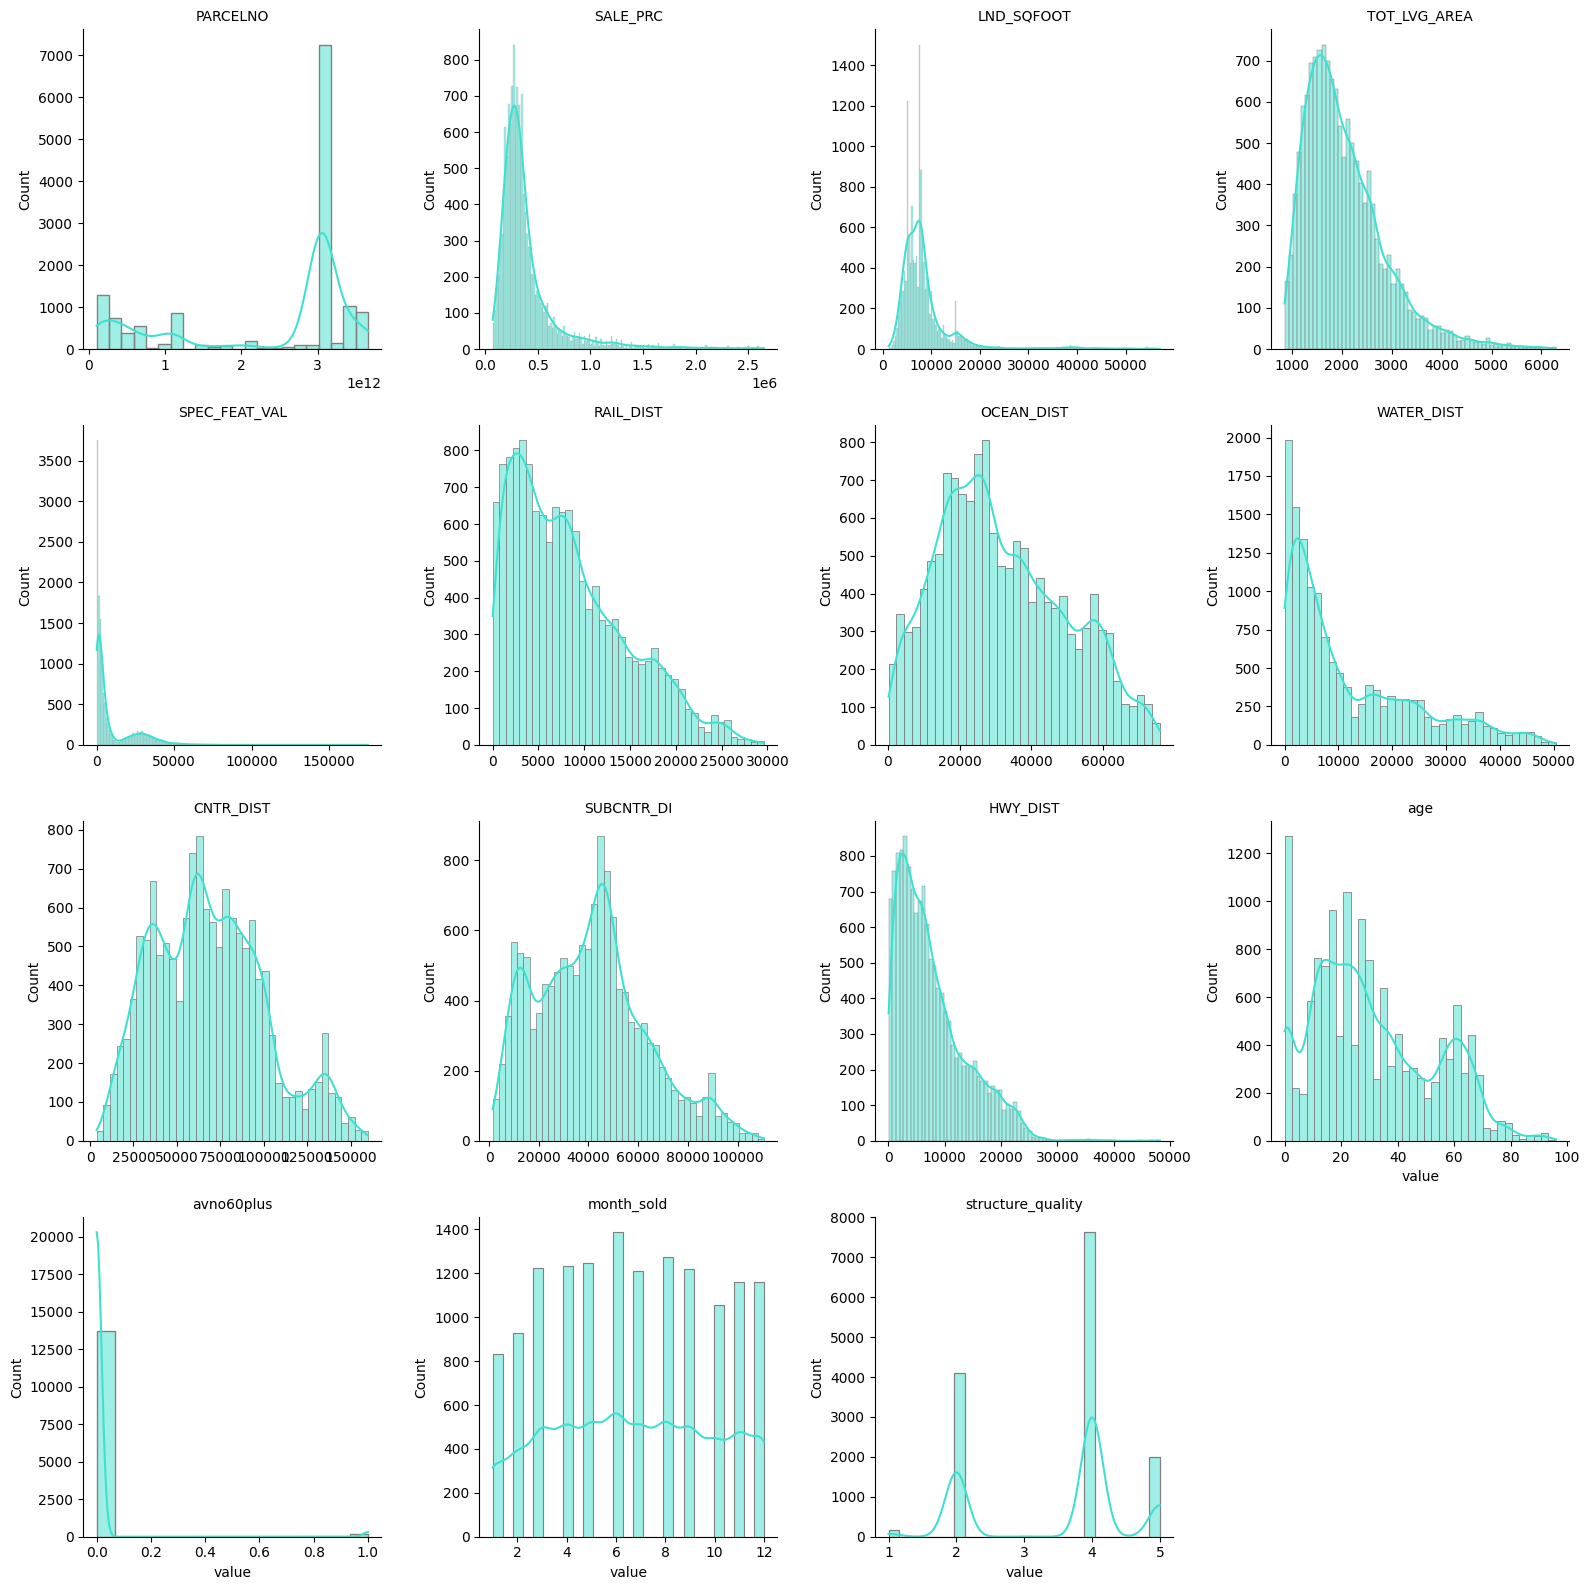

In [65]:
df_melt = df.drop(columns=['LATITUDE','LONGITUDE']).melt()
g = sns.FacetGrid(df_melt, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", color="turquoise",kde=True,edgecolor="grey")
g.set_titles("{col_name}")
plt.show()

#### Key Notes of Initial Data Review
- ParcelNo shows some sort of indexing system but should show no form of analysis capabilities.
- Columns such as Sales Price, Land Size (Square Foot),Total Living Area, Special Feature Value appears to be left skewed (Note to be normalised or standardised)
- Columns such av60noplus, month_sold, structure_quality are categorical of nature (Note to convert into categorical values, check if ordinal or nominal)

In [56]:
df.isna().sum()

LATITUDE              0
LONGITUDE             0
PARCELNO              0
SALE_PRC              0
LND_SQFOOT            0
TOT_LVG_AREA          0
SPEC_FEAT_VAL         0
RAIL_DIST            23
OCEAN_DIST            0
WATER_DIST            0
CNTR_DIST             0
SUBCNTR_DI            0
HWY_DIST              0
age                   0
avno60plus            0
month_sold            0
structure_quality     0
dtype: int64

23 missing values on Highway Distance

## EDA | Exploratory Data Analysis

In [75]:
df_melt = df.melt(id_vars='SALE_PRC')

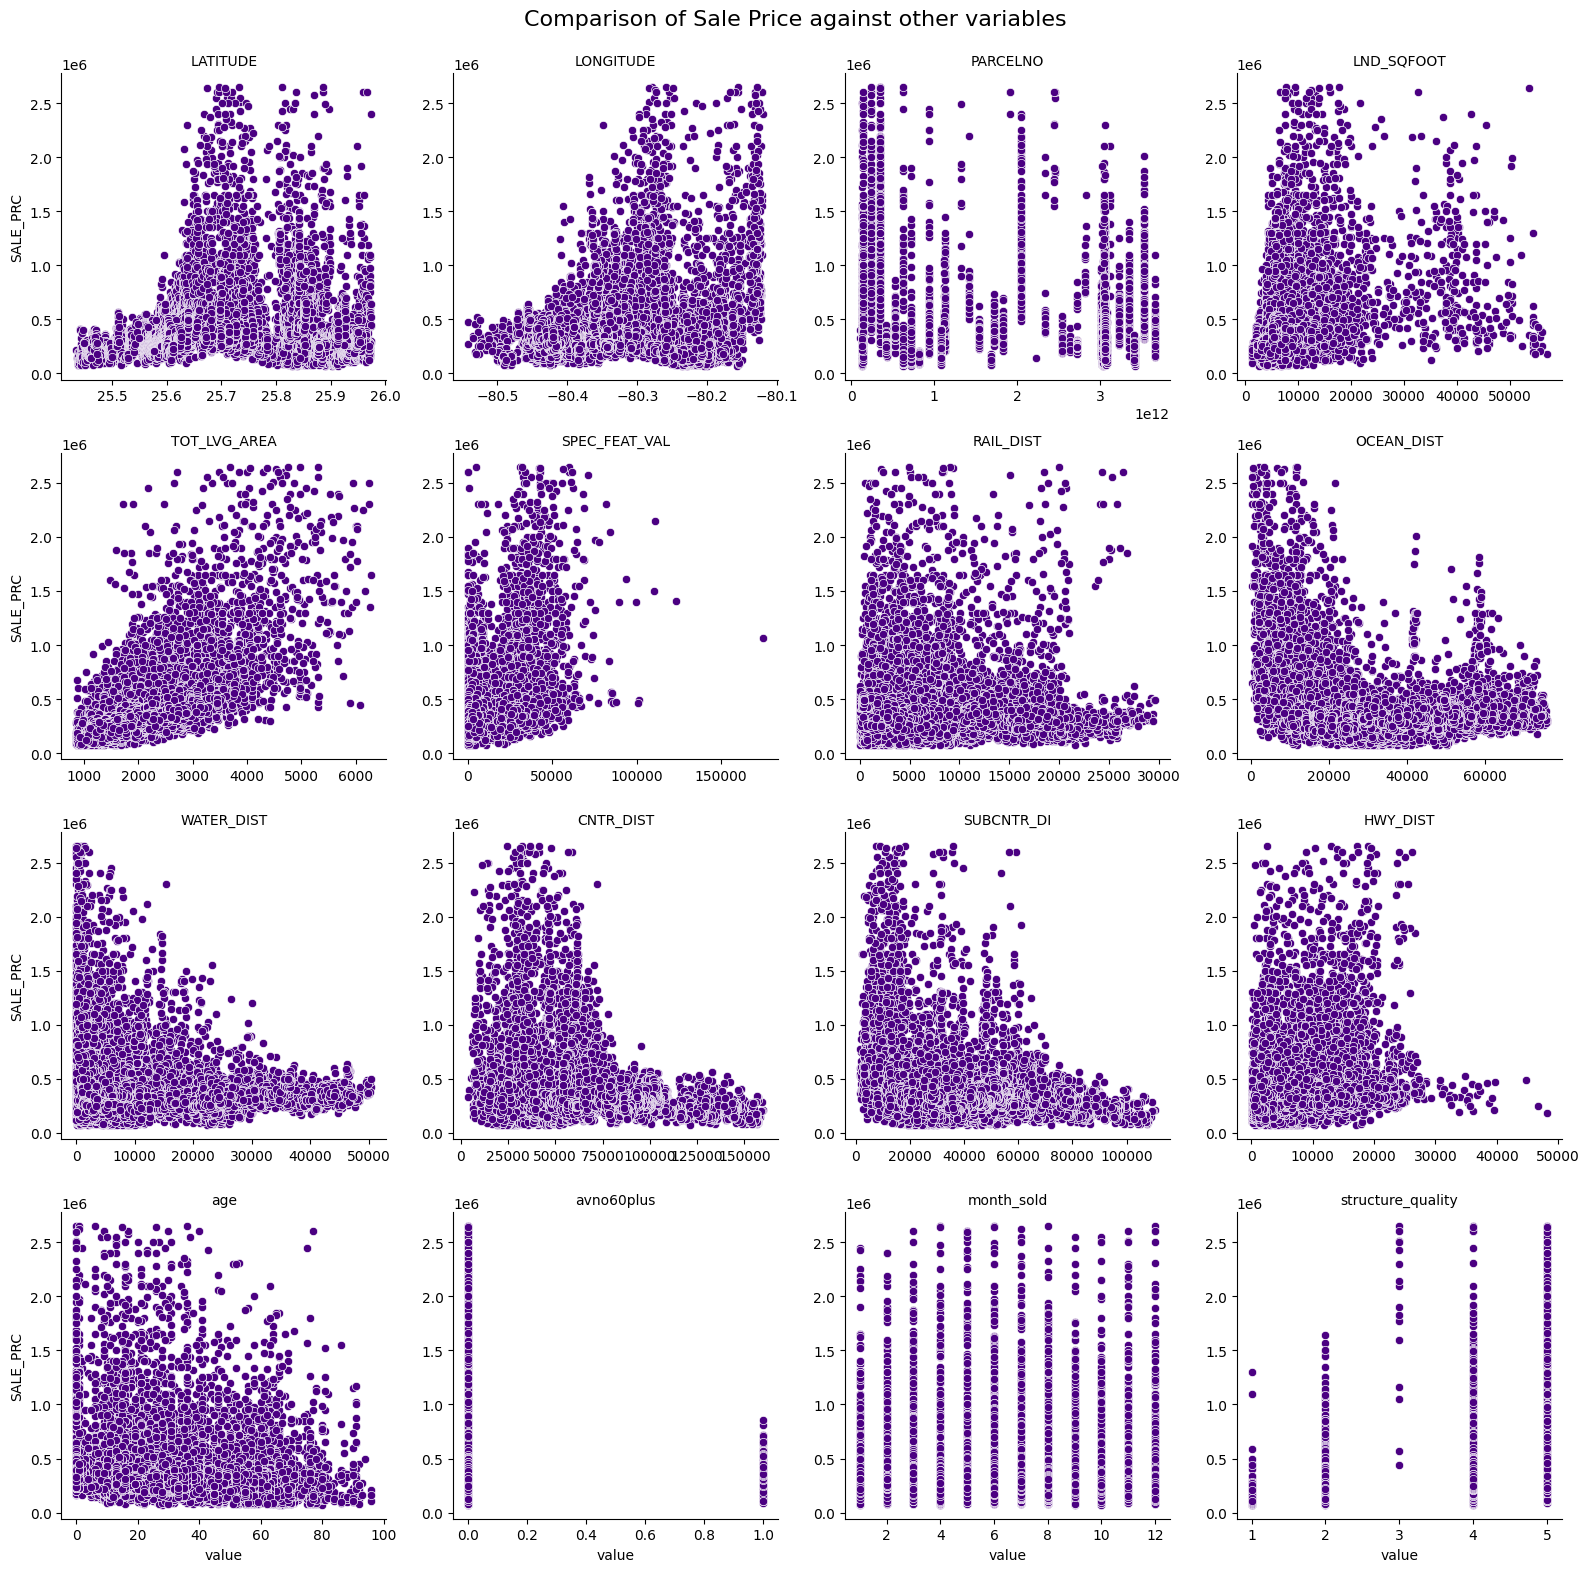

In [91]:
ax = sns.FacetGrid(df_melt, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
ax.map(sns.scatterplot,"value","SALE_PRC", color="indigo")
ax.set_titles("{col_name}")
plt.subplots_adjust(top=0.94) 
ax.figure.suptitle("Comparison of Sale Price against other variables", fontsize=16)
plt.show()

### Key Notes

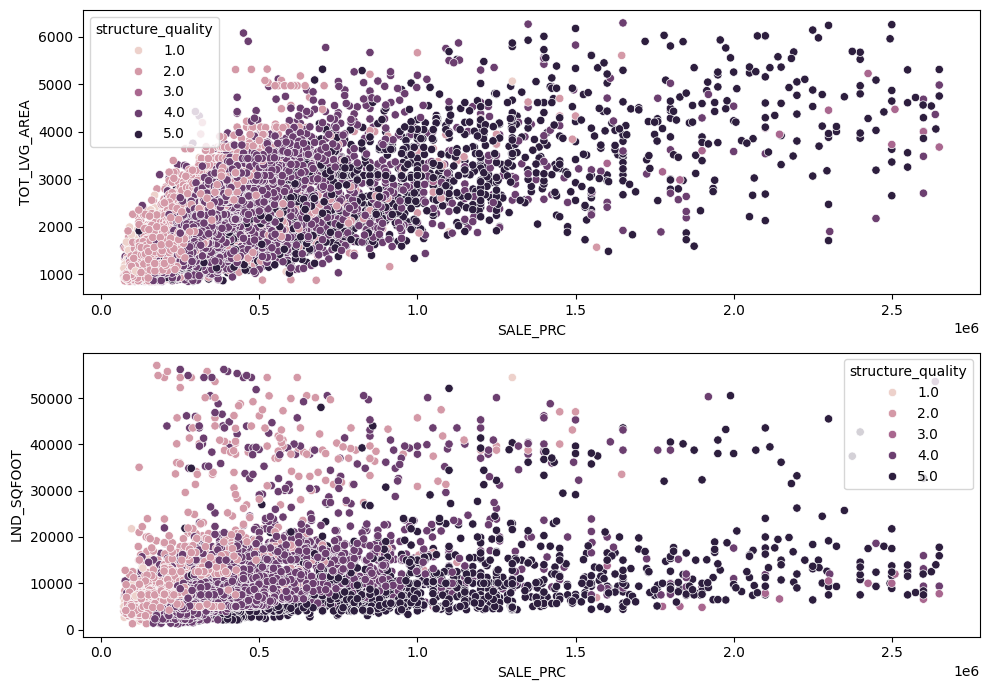

In [113]:
fig, ax=plt.subplots(2,figsize=(10,7))
sns.scatterplot(x=df['SALE_PRC'],y=df['TOT_LVG_AREA'],hue=df['structure_quality'],ax=ax[0])
sns.scatterplot(x=df['SALE_PRC'],y=df['LND_SQFOOT'],hue=df['structure_quality'],ax=ax[1])
plt.tight_layout()
plt.show()

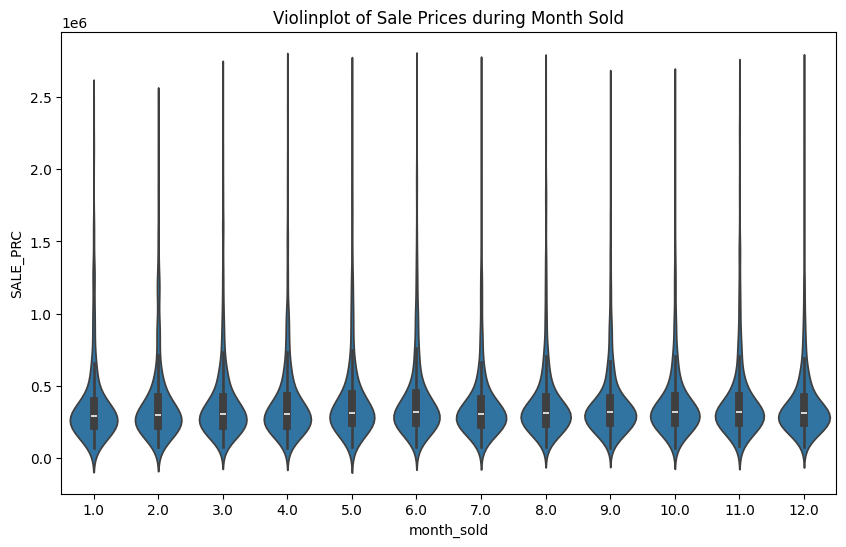

In [126]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['SALE_PRC'],x=df['month_sold'])
plt.title('Violinplot of Sale Prices during Month Sold')
plt.show()

### Geospatial Analysis

In [130]:
import folium


 

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

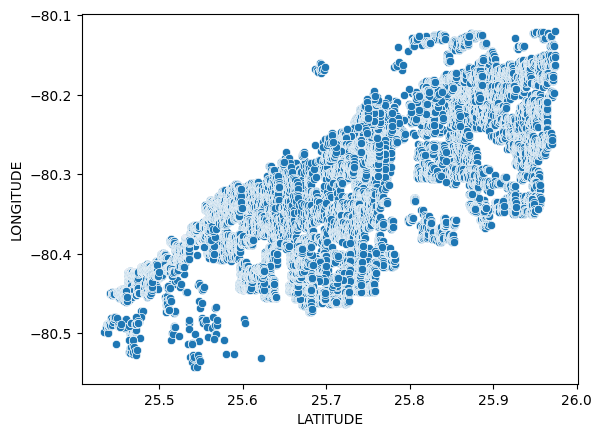

In [127]:
sns.scatterplot(x=df['LATITUDE'],y=df['LONGITUDE'])

In [128]:
df.head()


,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.222801e+11,440000.0,9375.0,1753.0,0.0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67.0,0.0,8.0,4.0
1,25.891324,-80.153968,6.222801e+11,349000.0,9375.0,1715.0,0.0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63.0,0.0,9.0,4.0
2,25.891334,-80.153740,6.222801e+11,800000.0,9375.0,2276.0,49206.0,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61.0,0.0,2.0,4.0
3,25.891765,-80.152657,6.222801e+11,988000.0,12450.0,2058.0,10033.0,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63.0,0.0,9.0,4.0
4,25.891825,-80.154639,6.222801e+11,755000.0,12800.0,1684.0,16681.0,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42.0,0.0,7.0,4.0
